In [23]:
import pandas as pd
import pandas_datareader as pddr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [24]:
sb.set()
rcParams['figure.figsize'] = 8, 6

In [25]:
tsla = pddr.get_data_yahoo('TSLA')

In [26]:
tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-06,37.316002,36.535999,37.104000,37.169998,16958000.0,37.169998
2016-12-07,38.680000,37.000000,37.230000,38.630001,27309500.0,38.630001
2016-12-08,38.500000,37.908001,38.410000,38.458000,15970500.0,38.458000
2016-12-09,38.768002,38.161999,38.174000,38.436001,13612500.0,38.436001
2016-12-12,38.883999,38.236000,38.560001,38.486000,12194500.0,38.486000


In [27]:
tsla_returns = round(np.log(tsla.Close).diff() * 100, 2)
tsla_returns.dropna(inplace = True)
tsla_returns.head()

Date
2016-12-07    3.85
2016-12-08   -0.45
2016-12-09   -0.06
2016-12-12    0.13
2016-12-13    2.93
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

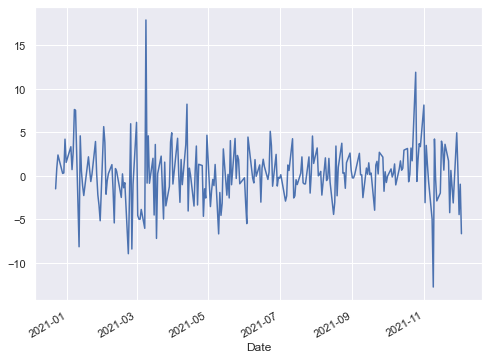

In [28]:
chart_tsla = tsla_returns[-240:]
chart_tsla.plot()

In [29]:
tsla_returns.describe()

count    1257.000000
mean        0.263111
std         3.771553
min       -23.650000
25%        -1.460000
50%         0.170000
75%         1.960000
max        18.140000
Name: Close, dtype: float64

In [30]:
!pip install scipy

In [31]:
from scipy import stats

In [32]:
n, minmax, mean, var, skew, kurt = stats.describe(tsla_returns)
mini, maxi = minmax
std = var ** .5

In [33]:
from scipy.stats import norm

In [34]:
x_tsla = norm.rvs(mean, std, n)

In [35]:
stats.describe(x_tsla)

DescribeResult(nobs=1257, minmax=(-11.961329871981361, 12.93508923678975), mean=0.32452391969534705, variance=13.540666848159626, skewness=-0.01674885722459765, kurtosis=0.04553867181430693)

(array([  2.,   3.,  10.,   9.,  52.,  45.,  87., 116., 151., 171., 159.,
        157., 118.,  76.,  52.,  28.,  11.,   5.,   3.,   2.]),
 array([-11.96132987, -10.71650892,  -9.47168796,  -8.22686701,
         -6.98204605,  -5.73722509,  -4.49240414,  -3.24758318,
         -2.00276223,  -0.75794127,   0.48687968,   1.73170064,
          2.97652159,   4.22134255,   5.4661635 ,   6.71098446,
          7.95580542,   9.20062637,  10.44544733,  11.69026828,
         12.93508924]),
 <BarContainer object of 20 artists>)

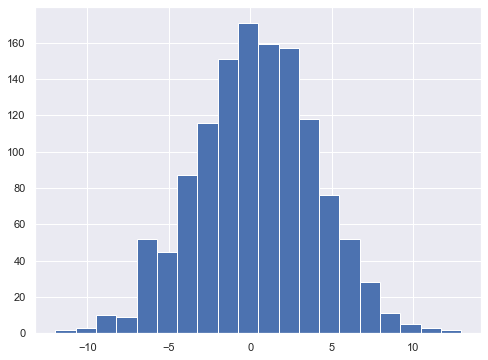

In [36]:
plt.hist(x_tsla, bins=20)

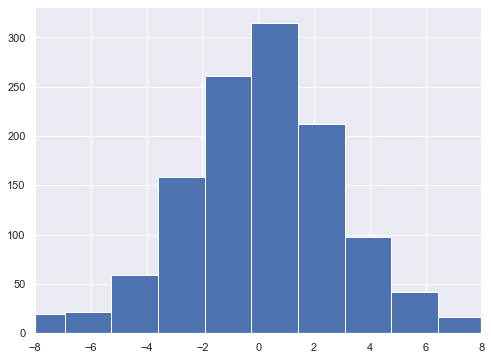

In [37]:
plt.hist(tsla_returns, bins = 25)
plt.xlim(-8,8);

In [38]:
x_test = stats.kurtosistest(x_tsla)
tsla_test = stats.kurtosistest(tsla_returns)
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"TSLA: {tsla_test[0]:13.2f}{tsla_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:             0.43          0.6693
TSLA:         12.55          0.0000


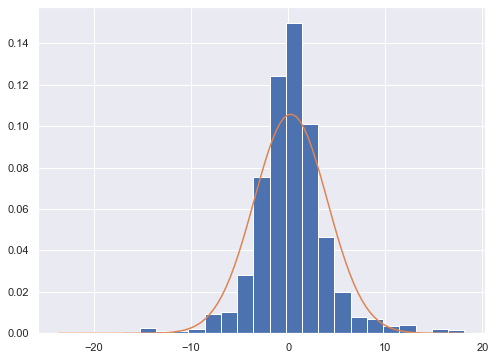

In [39]:
plt.hist(tsla_returns, bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std));

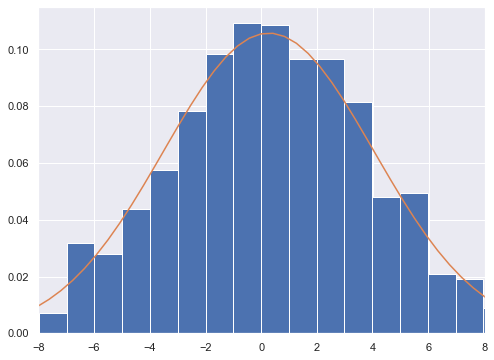

In [40]:
plt.hist(x_tsla, bins =25, density = True)
b_tsla = np.linspace(mini, maxi, 100)
plt.plot(b_tsla,stats.norm.pdf(b_tsla, mean, std))
plt.xlim(-8,8);

In [41]:
stats.ttest_1samp(tsla_returns.sample(252), 0)

Ttest_1sampResult(statistic=0.2614861918490327, pvalue=0.7939320349690061)

In [42]:
tsla_close = pd.DataFrame(tsla.Close, columns= ['Close'])
tsla_close['tsla_1'] = tsla_close.Close.shift(1)
tsla_close['tsla_2'] = tsla_close.Close.shift(2)
tsla_close.dropna(inplace = True)
tsla_close.head()

,Close,tsla_1,tsla_2
Date,,,
2016-12-08,38.458000,38.630001,37.169998
2016-12-09,38.436001,38.458000,38.630001
2016-12-12,38.486000,38.436001,38.458000
2016-12-13,39.630001,38.486000,38.436001
2016-12-14,39.737999,39.630001,38.486000


In [43]:
prediction_tsla = np.linalg.lstsq(tsla_close[['tsla_1', 'tsla_2']], tsla_close.Close, rcond=None)[0]

In [44]:
tsla_close['predict_price'] = np.dot(tsla_close[['tsla_1', 'tsla_2']], prediction_tsla)

In [45]:
tsla_close.head()

,Close,tsla_1,tsla_2,predict_price
Date,,,,
2016-12-08,38.458000,38.630001,37.169998,38.681914
2016-12-09,38.436001,38.458000,38.630001,38.555883
2016-12-12,38.486000,38.436001,38.458000,38.529567
2016-12-13,39.630001,38.486000,38.436001,38.577641
2016-12-14,39.737999,39.630001,38.486000,39.693314


<AxesSubplot:xlabel='Date'>

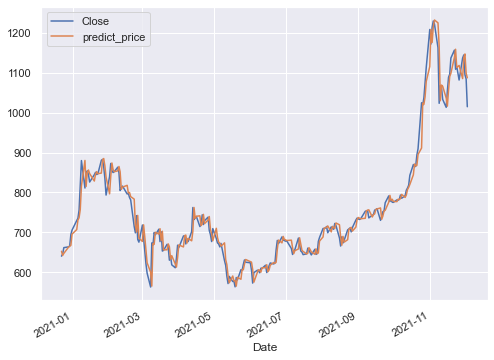

In [46]:
tsla_close.iloc[-240:][['Close', 'predict_price']].plot()